<a href="https://colab.research.google.com/github/Guru2308/ML-Certification/blob/main/Dimesionality_Reduction/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [45]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [46]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
0.9722222222222222


<ipython-input-58-7dee87d103cd>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


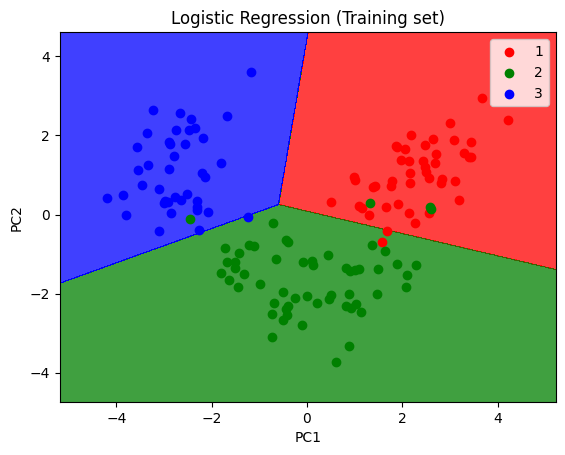

In [58]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a meshgrid for the third component, assuming its mean value
X3_mean = x_set[:, 2].mean()
X3 = np.full(X1.shape, X3_mean)

# Stack the meshgrids to create the input for prediction with 3 features
# The order should match the order of components in X_train
X_predict = np.array([X1.ravel(), X2.ravel(), X3.ravel()]).T


plt.contourf(
    X1, X2, lr.predict(X_predict).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(['red', 'green', 'blue'])
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(['red', 'green', 'blue'])(i), label = j
    )

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

<ipython-input-61-f68c3db502e1>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


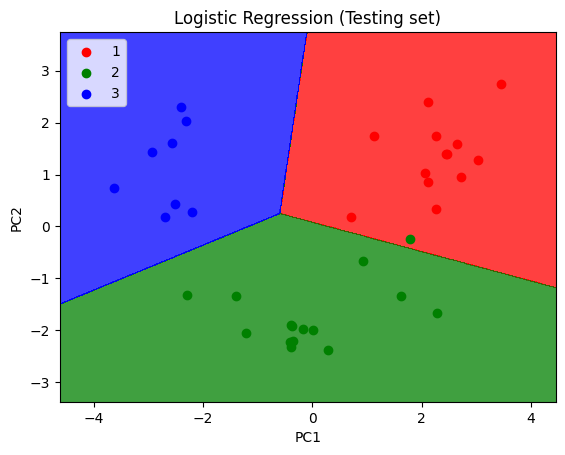

In [61]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_test, y_pred

X1, X2 = np.meshgrid(
    np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
)

# Create a meshgrid for the third component, assuming its mean value
X3_mean = x_set[:, 2].mean()
X3 = np.full(X1.shape, X3_mean)

# Stack the meshgrids to create the input for prediction with 3 features
# The order should match the order of components in X_train
X_predict = np.array([X1.ravel(), X2.ravel(), X3.ravel()]).T


plt.contourf(
    X1, X2, lr.predict(X_predict).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(['red', 'green', 'blue'])
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c = ListedColormap(['red', 'green', 'blue'])(i), label = j
    )

plt.title('Logistic Regression (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()